In [1]:
## Install Tweepy [Python driver for Twitter API]
#!pip install tweepy

### Basic Library Imports

In [2]:
import numpy as np
import os
import tweepy as tw
import pandas as pd

### Set up Twitter API credentials

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### Trump Twitter Trend Analysis 

In [5]:
# Define the search term and the date_since date as variables
search_words = "#trump"
date_since = "2019-07-01"

### Getting the last 10 tweets with #trump

In [6]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(10)

# Collect a list of tweets
[tweet.text for tweet in tweets]

['RT @cassandra17lina: @TomJChicago #Trump’s greedy, depraved family will ride that faltering horse straight to the glue factory if it means…',
 'RT @dennis0805a: @perlmutations THE RESULTS ARE IN:\n\nSince #Trump\'s 2016 Campaign Slogan of "Make America Great Again" aka #MAGA was voted…',
 'In Salute to America speech @realDonaldTrump taught us all that Desert Storm happened during Vietnam, and that it w… https://t.co/6dsr6gWSQd',
 'RT @Otto_English: Too marvellous for words. #Trump https://t.co/Y4R5OLRRS1',
 'Thread by @murray_nyc: THREAD: 12 Reasons to NOT Vote for #DonaldTrump 4 more yrs of #Trump as president would be c… https://t.co/NSQglOpYup',
 '#trump the jokes on him. #gimmeabreak -Mr. Trump cast himself as the heir to “American heroes” who defeated Nazis,… https://t.co/FsS78iLPv4',
 '@Calloutfortruth .\n@IM4IM2 .\n@LisaMei62 .\n@KarluskaP .\n@Inevitable_ET .\n@atensnut .\n@gcamp4 .\n@RobManess .… https://t.co/5nNelhuGei',
 "RT @Laurie_Garrett: I'll venture a wild guess: If y

#### Too many retweets here, lets get rid of them since retweets could link to a single tweet many times and we would like to focus on unique tweets

In [7]:
new_search = search_words + " -filter:retweets"
new_search

'#trump -filter:retweets'

In [8]:
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(10)

[tweet.text for tweet in tweets]

['In Salute to America speech @realDonaldTrump taught us all that Desert Storm happened during Vietnam, and that it w… https://t.co/6dsr6gWSQd',
 'Thread by @murray_nyc: THREAD: 12 Reasons to NOT Vote for #DonaldTrump 4 more yrs of #Trump as president would be c… https://t.co/NSQglOpYup',
 '#trump the jokes on him. #gimmeabreak -Mr. Trump cast himself as the heir to “American heroes” who defeated Nazis,… https://t.co/FsS78iLPv4',
 '@Calloutfortruth .\n@IM4IM2 .\n@LisaMei62 .\n@KarluskaP .\n@Inevitable_ET .\n@atensnut .\n@gcamp4 .\n@RobManess .… https://t.co/5nNelhuGei',
 'Omg.  Classic #Trump #dementia https://t.co/WYj0NCHcck',
 '#Trump to the rest of you goes to the Boarder wall . pump breaks before you start the car just do it 5 times.',
 '“We stand tall, we stand proud, and we only kneel, to the almighty God”... So awesome. God bless President #Trump https://t.co/sDrwyDRym7',
 "Definition of tag your man. Trump was like Ye you got this. 😆🤣 Maybe those reports of Trump feeling like h

### Location of users tweeting about Trump [Based on last 1000 tweets]

In [9]:
## analyze location of users tweeting about Wellness [last 1000 tweets]
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(1000)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['DaTwilightZone', 'Floriduh'],
 ['brokenwing2005', 'BananaRepublicFailedState'],
 ['UnalienblWrites', 'United States'],
 ['JeffSmith052965', 'Phoenix Arizona 85006'],
 ['kaoconnor', 'El Paso TX'],
 ['ionheartus', 'United States'],
 ['collinstawiah3', ''],
 ['_YFDF_', 'Under your dermis.'],
 ['financejonE', 'Orange County, CA'],
 ['AlexisCeule', ''],
 ['StoriesTweet', ''],
 ['Roadrunner19673', 'U. S.'],
 ['KRegentpark', 'Canada'],
 ['TimothyReyes42', ''],
 ['YodaCon', ''],
 ['StCyrlyMe2', 'Henderson Nv'],
 ['revolutionbml', ''],
 ['reallaker32', ''],
 ['tonytonypeyser', 'Altadena, CA'],
 ['ross_ving', 'USA'],
 ['nkbramer', 'ÜT: 32.795822,-115.564616'],
 ['PotamusHippo1', ''],
 ['Wulalowe', 'Taos, New Mexico'],
 ['ricklevy67', ''],
 ['ionheartus', 'United States'],
 ['tonytonypeyser', 'Altadena, CA'],
 ['seagullsquirrel', ''],
 ['riddlewinnie1', 'United States'],
 ['BananaCologne', '“At work” virtually rigth now.'],
 ['Slownomaguy', 'Santa Rosa, CA'],
 ['StCyrlyMe2', 'Henderson Nv'],
 

In [10]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])
tweet_text

,user,location
0,DaTwilightZone,Floriduh
1,brokenwing2005,BananaRepublicFailedState
2,UnalienblWrites,United States
3,JeffSmith052965,Phoenix Arizona 85006
4,kaoconnor,El Paso TX
...,...,...
995,bells110,dc
996,vorevernon,LOONA
997,calvineon,minnesota
998,MiniMunchkinMe,Preston


In [11]:
tweet_text['location'].value_counts()

                                305
United States                    24
California, USA                  17
Planet Earth                     12
USA                              10
                               ... 
東京都足立区（最寄り駅＝五反野・小菅・梅島・青井・綾瀬）      1
West Wareham, MA                  1
Glasgow, MT                       1
Mount Sinai                       1
Pennsylvania, USA                 1
Name: location, Length: 416, dtype: int64

#### The tweets on Trump seem to be mostly from USA as expected but a lot of them do not have a location parameter set and hence of those 1000 tweets, 300 users do not disclose their location.

In [12]:
#!pip install networkx

### Other necessary imports

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

### Data Preprocessing for further analysis

In [14]:
## Most Recent 1000 Tweets with #trump
search_term = "#trump -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-07-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['#BREAKING A troop of #ducklings making their way across the road &amp; sidewalks #runningwild around  #whitehouse.\n\nWe… https://t.co/XmqqcsV9Ga',
 "No #Trump tweets in the last 4 hours! What's up with that?",
 "#Trump's #Angry #Words, #Virus darken #USA #July4th weekend https://t.co/bQY2tArSWa \n\n#Politics",
 'Imagine a US president defending the Confederacy. #Trump must go! https://t.co/JCedhMXv0r',
 'In Salute to America speech @realDonaldTrump taught us all that Desert Storm happened during Vietnam, and that it w… https://t.co/6dsr6gWSQd']

### Removing URL from tweets for clarity

In [15]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [16]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:3] ## Grab first three tweets

['BREAKING A troop of ducklings making their way across the road amp sidewalks runningwild around whitehouseWe',
 'No Trump tweets in the last 4 hours Whats up with that',
 'Trumps Angry Words Virus darken USA July4th weekend Politics']

### Lower casing all the words to produce word frequency

In [17]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]

### Finding Top 20 Words used in tweets about Trump [Last 1000 tweets]

In [18]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(20)

[('trump', 679),
 ('the', 517),
 ('a', 304),
 ('to', 297),
 ('of', 261),
 ('is', 257),
 ('and', 233),
 ('in', 176),
 ('you', 163),
 ('for', 135),
 ('i', 116),
 ('realdonaldtrump', 111),
 ('this', 105),
 ('with', 97),
 ('that', 97),
 ('his', 89),
 ('on', 87),
 ('are', 87),
 ('he', 86),
 ('be', 81)]

In [19]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(20),
                             columns=['words', 'count'])

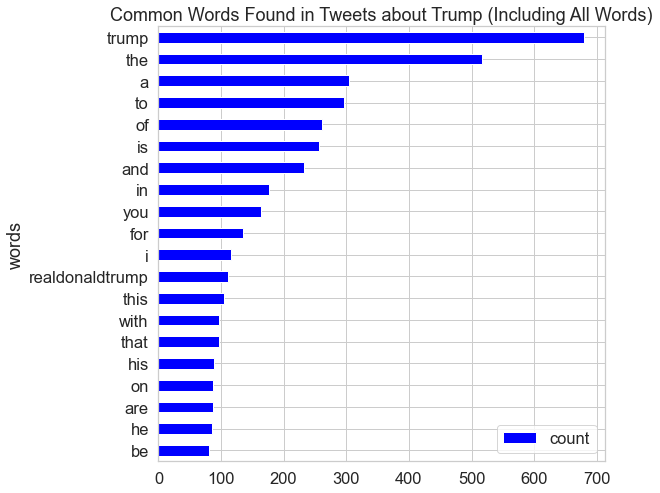

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Tweets about Trump (Including All Words)")

plt.show()

#### Includes a lot of words which do not convey any meaningful results. Need to add stopwords to extract meaningful hidden semantics 

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mayurbansal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['for',
 'shouldn',
 'they',
 'while',
 'nor',
 'very',
 'to',
 'haven',
 'here',
 'did']

### Removing stopwords from all the extracted tweets

In [23]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

In [24]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(20)

[('trump', 679),
 ('realdonaldtrump', 111),
 ('amp', 65),
 ('trumps', 63),
 ('america', 56),
 ('july', 53),
 ('people', 44),
 ('speech', 43),
 ('like', 43),
 ('us', 42),
 ('president', 42),
 ('4th', 40),
 ('know', 35),
 ('potus', 32),
 ('one', 32),
 ('american', 31),
 ('4', 28),
 ('dont', 28),
 ('covid19', 27),
 ('maga', 27)]

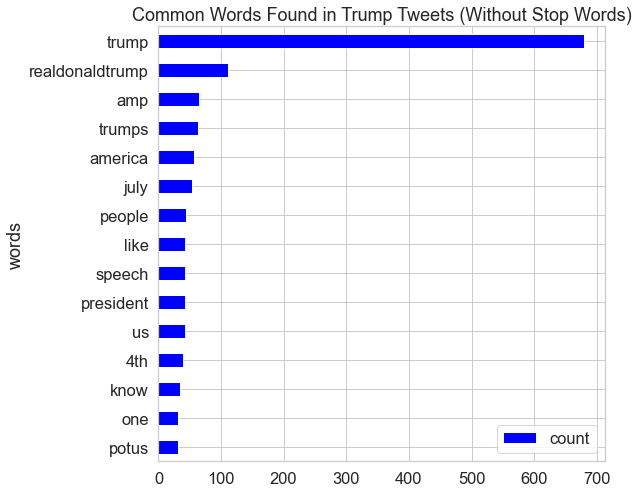

In [25]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Trump Tweets (Without Stop Words)")

plt.show()

#### This provides us with a better view of words commonly used with Trump but again we see a lot of terms which are obvious and not telling the hidden story/sentiment of people when tweeting about Trump. So Let us include some personalized stopwords.

#### Also adding a condition of words to be more than 4 characters to exclude the common words 

In [26]:
collection_words = ['trump','donald','realdonaldtrump','president','people','american','trumps']
tweets_nsw_nc = [[w for w in word if not w in collection_words and len(w) > 4]
                 for word in tweets_nsw]

In [27]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(20)

[('america', 56),
 ('speech', 43),
 ('potus', 32),
 ('covid19', 27),
 ('joebiden', 27),
 ('whitehouse', 26),
 ('4thofjuly', 25),
 ('americans', 25),
 ('think', 24),
 ('happy', 23),
 ('would', 22),
 ('country', 22),
 ('coronavirus', 22),
 ('doesnt', 22),
 ('independence', 19),
 ('biden', 19),
 ('going', 19),
 ('racist', 18),
 ('never', 18),
 ('today', 17)]

In [28]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(20),
                             columns=['words', 'count'])

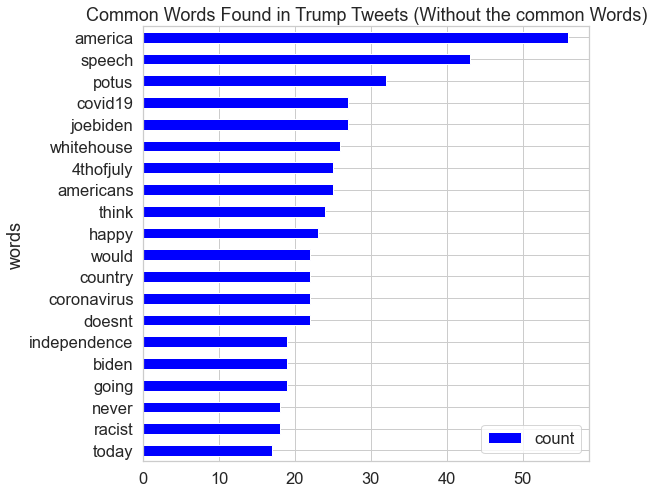

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Trump Tweets (Without the common Words)")

plt.show()

#### Okay, now we have a better context of how Trump is being presented in Tweets. America, Speech, Potus, Covid19, Joe Biden, 4thofJuly are some of the most frequent keywords used for Trump. Though this frequency analysis is based on just last 1000 tweets. Can increase the threshold to gain more context.

### BiGram Analysis for added context

In [30]:
from nltk import bigrams

In [31]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

In [32]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('desert', 'storm'), 11),
 (('salute', 'america'), 8),
 (('white', 'house'), 7),
 (('united', 'states'), 6),
 (('4thofjuly', 'chose'), 6),
 (('chose', 'siding'), 6),
 (('siding', 'whitesupremacists'), 6),
 (('claims', 'victory'), 5),
 (('mount', 'rushmore'), 5),
 (('socalvalleygal', 'jovanijustin'), 4),
 (('jovanijustin', 'lrihendry'), 4),
 (('republicans', 'enabled'), 4),
 (('heathighlights', 'killakyrie2'), 4),
 (('garden', 'heroes'), 4),
 (('liberty', 'pursuit'), 4),
 (('pursuit', 'happiness'), 4),
 (('happiness', 'july4th'), 4),
 (('july4th', 'hongkong'), 4),
 (('national', 'garden'), 4),
 (('whitesupremacists', 'wethepeople'), 4)]

In [33]:
# Create a network plot of grouped terms
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

### Let us create a Network of these Bigrams to visualize the connections between the usage of these words

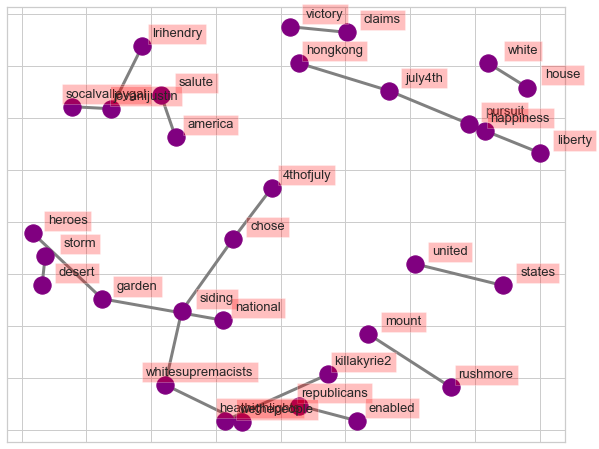

In [34]:
import networkx as nx
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))


fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

#### We notice different clusters based on the usage of terms. The one cluster which catches attention is revolving around his Mount Rushmore Speech which he delivered on July 3, 2020 including words like desert storm, american heroes, 4th july etc. Also we notice a network of tweets around white supremacists and republicans which might refer to a section of political views of Twitter users. 

In [35]:
#!pip install textblob

In [36]:
# Create textblob objects of the tweets
import textblob
from textblob import TextBlob
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

In [37]:
# Create list of polarity values and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[5:8]

[[0.5,
  'Thread by murraynyc THREAD 12 Reasons to NOT Vote for DonaldTrump 4 more yrs of Trump as president would be c'],
 [0.0,
  'trump the jokes on him gimmeabreak Mr Trump cast himself as the heir to American heroes who defeated Nazis'],
 [0.0,
  'Calloutfortruth IM4IM2 LisaMei62 KarluskaP InevitableET atensnut gcamp4 RobManess']]

In [38]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df[0:10]

,polarity,tweet
0,0.000000,BREAKING A troop of ducklings making their way...
1,0.000000,No Trump tweets in the last 4 hours Whats up w...
2,-0.500000,Trumps Angry Words Virus darken USA July4th we...
3,0.000000,Imagine a US president defending the Confedera...
4,0.000000,In Salute to America speech realDonaldTrump ta...
5,0.500000,Thread by murraynyc THREAD 12 Reasons to NOT V...
6,0.000000,trump the jokes on him gimmeabreak Mr Trump ca...
7,0.000000,Calloutfortruth IM4IM2 LisaMei62 KarluskaP Ine...
8,0.166667,Omg Classic Trump dementia
9,0.000000,Trump to the rest of you goes to the Boarder w...


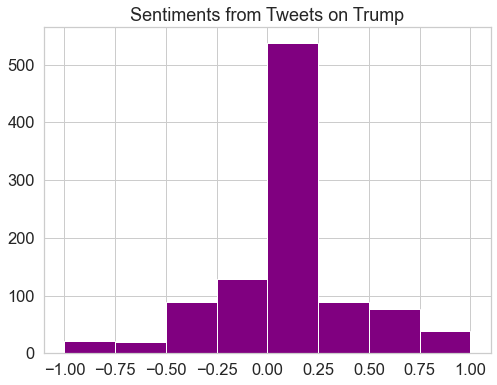

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25,0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Trump")
plt.show()

#### We notice a lot of tweets being between 0 and 0.25 in sentiments which is due to maximum of tweets having 0 as the polarity score. But interesting to note that histogram bins have higher peaks in the range [-0.5-0] than in [0.25-0.75] 

## Summary

### So this Twitter Analysis can help us identify what are the general sentiments around Trump via most recent Tweets. We can group this analysis further based on location and other demographics of Twitter users to gain more digital media insights.
